## Boston 집값 선형회귀 예제

#### 라이브러리 및 패키지 Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 경고 무시 (FutureWarning)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#### 데이터셋 불러오기

In [2]:
# Boston 집값 데이터셋 로드
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

In [16]:
# 데이터프레임 확인
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 데이터 전처리

In [4]:
# 데이터 전처리
X = df.drop(columns=['PRICE'])
y = df['PRICE']

In [5]:
# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 피처 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 데이터 분포 확인

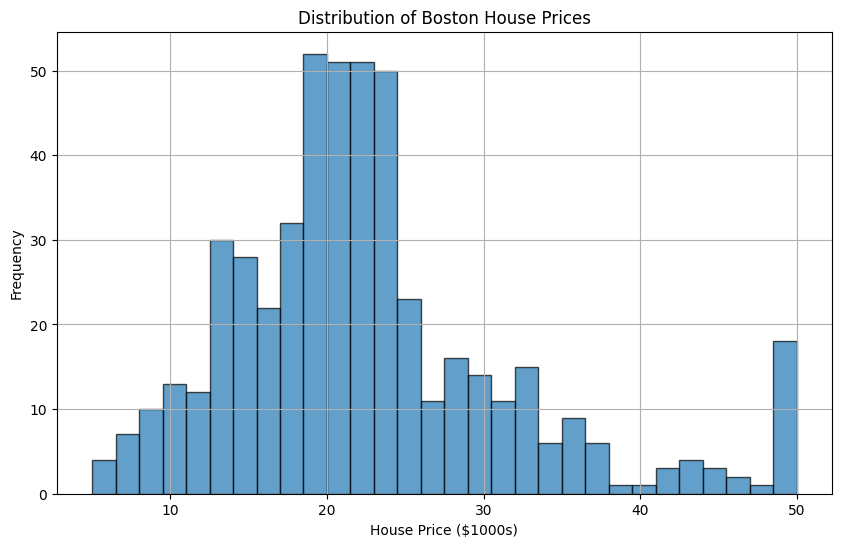

In [7]:
# 집값 데이터 분포 확인
plt.figure(figsize=(10, 6))
plt.hist(df['PRICE'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Boston House Prices')
plt.xlabel('House Price ($1000s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 데이터 학습

In [8]:
# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트로 예측 수행
y_pred = model.predict(X_test)

#### 성능 및 결과 확인

In [13]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared Score: {r2}')

MSE: 24.291119474973517
RMSE: 4.928602182665336
R-squared Score: 0.668759493535632


In [14]:
# 절편(intercept) / 회귀계수(coefficients) 확인
print("절편(intercept):", model.intercept_)
print("회귀계수(coefficients):", np.round(model.coef_, 2))

절편(intercept): 22.796534653465343
회귀계수(coefficients): [-1.    0.7   0.28  0.72 -2.02  3.15 -0.18 -3.08  2.25 -1.77 -2.04  1.13
 -3.61]


#### 시각화

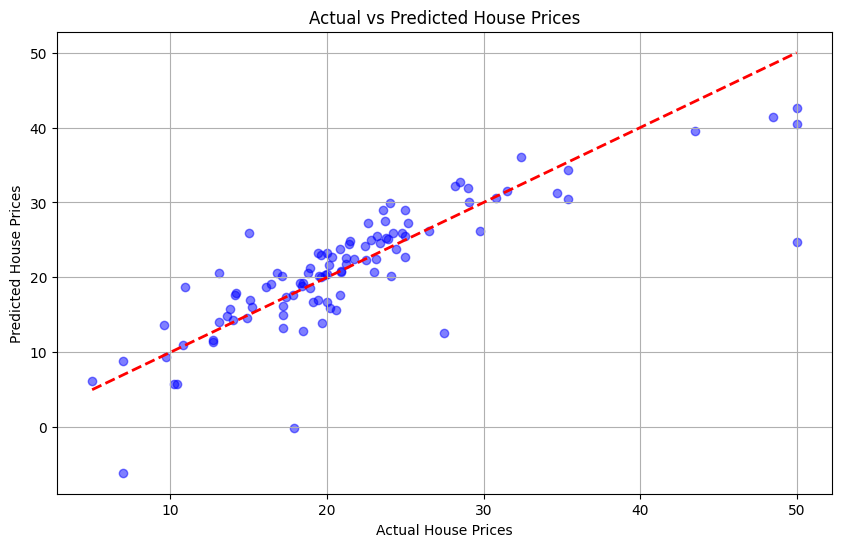

In [12]:
# 실제 값 vs 예측 값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.grid(True)
plt.show()